In [9]:
#load the dataset
import pandas as pd
import re
import joblib

path= r"C:\Users\IVSDL0025_User\Desktop\Customer Churn.csv"
df = pd.read_csv(path)
df.head()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0


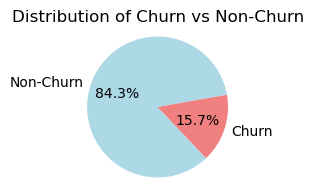

In [10]:
import matplotlib.pyplot as plt
# Plot a pie chart showing the distribution of churn vs non-churn
churn_counts = df['Churn'].value_counts()
labels = ['Non-Churn', 'Churn']  # Label 0 as Non-Churn and 1 as Churn
colors = ['lightblue', 'lightcoral']

plt.figure(figsize=(2, 2))
plt.pie(churn_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=10)
plt.title('Distribution of Churn vs Non-Churn')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [11]:
#handle missing data, if any
df= df.dropna() 
def clean_column_names(col):
    # Remove leading and trailing whitespace
    col = col.strip()
    # Replace multiple spaces with a single space
    col = re.sub(r'\s+', ' ', col)
    return col

# Apply the cleaning function to all column names
df.columns = [clean_column_names(col) for col in df.columns]
print(df.columns)
if 'Subscription Length' in df.columns and 'Customer Value' in df.columns:
    df['AvgMonthlySpend'] = df['Customer Value'] / df['Subscription Length']
else:
    print("One or both columns for feature engineering are missing")
#convert binary categorical variables into integer to ensure integrity
binary_columns = ['Complains', 'Tariff Plan', 'Status', 'Churn']
for col in binary_columns:
    df[col]=df[col].astype(int)


Index(['Call Failure', 'Complains', 'Subscription Length', 'Charge Amount',
       'Seconds of Use', 'Frequency of use', 'Frequency of SMS',
       'Distinct Called Numbers', 'Age Group', 'Tariff Plan', 'Status', 'Age',
       'Customer Value', 'Churn'],
      dtype='object')


In [12]:
#Feature engineering
df['AvgMonthlySpend'] = df['Customer Value'] / df['Subscription Length']

#separate feature and target variable
features = df.drop(columns=['Churn'])
target = df['Churn']

In [15]:
#Random Forest Algorithm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#Split the data in to training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state = 42)

#Train the model
model = RandomForestClassifier()
model.fit(X_train, y_train)

#Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.9333333333333333
Precision: 0.8333333333333334
Recall: 0.7727272727272727
F1 Score: 0.8018867924528302


In [16]:
df.to_csv('data/processed_data.csv', index=False)
joblib.dump(model, 'models/churn_model.pkl')

['models/churn_model.pkl']